In [5]:
import pandas as pd
import os
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

fontsize=14

plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)

dataset_dir = '/path/to/dataset/here/'

In [6]:
def get_volume(path):
    im = sitk.ReadImage(path)
    
    shape_stats = sitk.LabelShapeStatisticsImageFilter()
    shape_stats.Execute(im > 0)
    return shape_stats.GetPhysicalSize(1) / 1000

In [3]:
df_clinical = pd.read_csv(os.path.join(dataset_dir, 'clinical_data.csv'), index_col=0)
df_volumes = pd.DataFrame()
for i, row_clinical in df_clinical.iterrows(): #enumerate(os.listdir(imdir_atlas)):
    #row_clinical = df_clinical.loc[df_clinical['SUBJECT'] == d]
    gender = row_clinical['Sex']  
    age = row_clinical['Age at baseline']
    pq = row_clinical['1p19q codeletion']
    tts = row_clinical['T0']
    ttp = row_clinical['T1']
    ttf = row_clinical['T2']
        
    base_seg = os.path.join(dataset_dir, i, 'SOURCE', 'BASE_SEG.nii.gz')
    vol_base = get_volume(base_seg)
    df_volumes.loc[i+'T_0', 'DATE_diff'] = row_clinical['T0']
    df_volumes.loc[i+'T_0', 'Volume'] = vol_base
    df_volumes.loc[i+'T_0', 'SUBJECT'] = i
    
    post_seg = os.path.join(dataset_dir, i, 'SOURCE', 'POSTOP_T1_SEG.nii.gz')
    vol_post = get_volume(post_seg)
    df_volumes.loc[i+'T_1', 'DATE_diff'] = row_clinical['T1']
    df_volumes.loc[i+'T_1', 'Volume'] = vol_post
    df_volumes.loc[i+'T_1', 'SUBJECT'] = i

    
    fu_seg = os.path.join(dataset_dir, i, 'SOURCE', 'FOLLOWUP_FLAIR_SEG.nii.gz')
    vol_fu = get_volume(fu_seg)
    df_volumes.loc[i+'T_2', 'DATE_diff'] = row_clinical['T2']
    df_volumes.loc[i+'T_2', 'Volume'] = vol_fu
    df_volumes.loc[i+'T_2', 'SUBJECT'] = i
    
    print(f'{i[4:]} & {gender} & {age:.0f} & {pq} & {vol_base:.0f} & {vol_post:.0f} & {vol_fu:.0f} & {tts:.0f} & {ttp:.0f} & {ttf:.0f} \\\\')

    

01 & M & 46 & No & 11 & 4 & 11 & -72 & 2 & 2525 \\
02 & M & 41 & Yes & 39 & 23 & 33 & -84 & 1110 & 1628 \\
03 & M & 30 & No & 45 & 45 & 62 & -74 & 151 & 890 \\
04 & M & 27 & No & 48 & 2 & 11 & -95 & 693 & 2967 \\
05 & M & 45 & Yes & 16 & 5 & 14 & -11 & 158 & 1774 \\
06 & F & 50 & Yes & 37 & 9 & 27 & -7 & 66 & 2929 \\
07 & F & 48 & Yes & 59 & 0 & 8 & -6 & 1 & 1438 \\
08 & M & 46 & No & 22 & 2 & 8 & -20 & 1 & 1278 \\
09 & M & 33 & No & 68 & 41 & 85 & -105 & 109 & 772 \\
10 & F & 42 & Yes & 31 & 6 & 30 & -116 & 566 & 3788 \\
11 & M & 40 & Yes & 42 & 7 & 21 & -83 & 3 & 2752 \\
12 & M & 42 & Yes & 54 & 25 & 35 & -71 & 1 & 2482 \\
13 & M & 73 & Yes & 20 & 9 & 14 & -68 & 113 & 1401 \\
14 & M & 45 & Yes & 7 & 6 & 19 & -52 & 1 & 726 \\


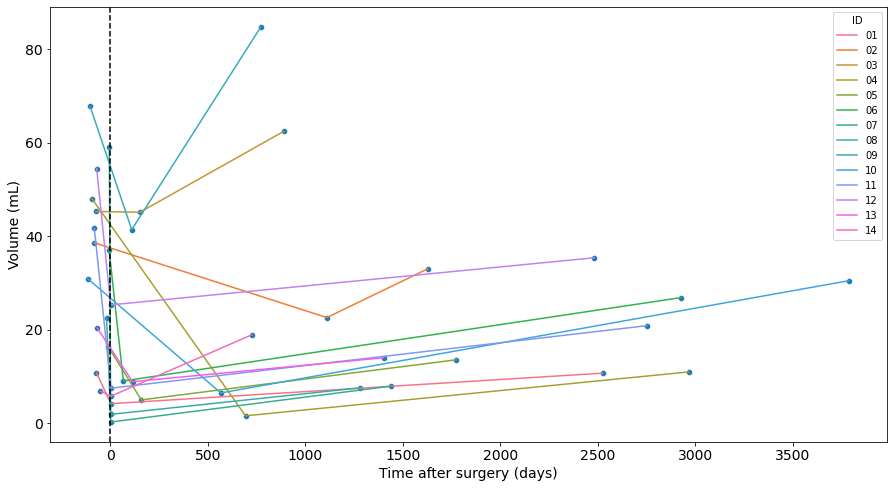

In [4]:
plt.figure(figsize=(15,8))
df_volumes['ID'] = df_volumes['SUBJECT'].str[4:]
sns.scatterplot(data=df_volumes, y='Volume', x='DATE_diff', legend=False)
sns.lineplot(data=df_volumes, y='Volume', x='DATE_diff', hue='ID')
plt.axvline(color='k', ls='--')
plt.xlabel('Time after surgery (days)')
plt.ylabel('Volume (mL)')
plt.savefig('figures/volumes_clinical.jpg')
plt.show()
plt.close()